In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


# data loading

In [3]:
df = pd.read_excel("Complex_Credit_Scoring_Dataset.xlsx", sheet_name="Sheet1")
df = df.drop(columns=["Customer_ID"])
df.head(30)

,Age,Income,Debts,Payment_History,Credit_Score,Loan_Amount,Loan_Purpose,Employment_Status,Marital_Status,Defaulted
0,33,46555,46090,No history,787,43139,Home,Retired,Widowed,1
1,41,54526,4930,Late,698,35978,Home,Unemployed,Single,1
2,62,79956,36687,Missed,797,48501,Medical,Retired,Married,0
3,43,52520,39467,Missed,694,24795,Education,Unemployed,Married,1
4,32,85756,47655,No history,840,14702,Medical,Student,Widowed,1
5,35,35680,20892,No history,309,25184,Education,Student,Widowed,1
6,22,121845,37714,Late,784,17382,Personal,Student,Widowed,0
7,36,72726,23402,Late,740,30741,Medical,Self-Employed,Widowed,1
8,32,47009,39893,On-time,405,18525,Education,Employed,Widowed,0
9,40,106535,8006,On-time,674,6146,Auto,Retired,Married,0


In [5]:
df.tail()

,Age,Income,Debts,Payment_History,Credit_Score,Loan_Amount,Loan_Purpose,Employment_Status,Marital_Status,Defaulted
195,34,57761,18098,No history,823,5684,Medical,Retired,Widowed,0
196,54,55570,19735,Missed,603,5552,Medical,Retired,Widowed,1
197,41,47064,3129,Late,475,11781,Auto,Self-Employed,Divorced,1
198,51,97117,36934,Missed,586,43194,Medical,Student,Single,1
199,34,28326,11272,Late,584,23625,Medical,Unemployed,Married,0


In [7]:
df.shape

(200, 10)

In [9]:
df.sample(5)

,Age,Income,Debts,Payment_History,Credit_Score,Loan_Amount,Loan_Purpose,Employment_Status,Marital_Status,Defaulted
40,46,84419,5052,No history,676,38403,Education,Retired,Single,1
198,51,97117,36934,Missed,586,43194,Medical,Student,Single,1
7,36,72726,23402,Late,740,30741,Medical,Self-Employed,Widowed,1
97,65,93622,45417,On-time,481,47742,Education,Retired,Divorced,1
52,63,132317,15614,No history,312,32785,Home,Student,Single,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                200 non-null    int64 
 1   Income             200 non-null    int64 
 2   Debts              200 non-null    int64 
 3   Payment_History    200 non-null    object
 4   Credit_Score       200 non-null    int64 
 5   Loan_Amount        200 non-null    int64 
 6   Loan_Purpose       200 non-null    object
 7   Employment_Status  200 non-null    object
 8   Marital_Status     200 non-null    object
 9   Defaulted          200 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 15.8+ KB


In [11]:
df.describe()

,Age,Income,Debts,Credit_Score,Loan_Amount,Defaulted
count,200.00000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,43.08500,84394.265000,26038.675000,566.165000,27713.81500,0.565000
std,13.18663,37641.563776,14097.171705,169.119825,13626.11331,0.497001
min,21.00000,25327.000000,2201.000000,302.000000,5552.00000,0.000000
25%,32.00000,47600.250000,12877.250000,413.750000,15166.75000,0.000000
50%,43.50000,86613.000000,25460.000000,562.500000,28642.50000,1.000000
75%,55.00000,114359.750000,38185.750000,711.250000,39477.00000,1.000000
max,65.00000,149997.000000,49917.000000,843.000000,49664.00000,1.000000


# CHECKING NULL VALUE

In [12]:
df.isnull().sum()

Age                  0
Income               0
Debts                0
Payment_History      0
Credit_Score         0
Loan_Amount          0
Loan_Purpose         0
Employment_Status    0
Marital_Status       0
Defaulted            0
dtype: int64

 # Feature engineering

In [13]:
df["Debt_to_Income"] = df["Debts"] / df["Income"]


In [17]:
import pandas as pd
import numpy as np


# Safe drop for Customer_ID column

In [15]:
if 'Customer_ID' in df.columns:
    df.drop(columns=["Customer_ID"], inplace=True)

# Separate numeric and non-numeric columns

In [18]:
numeric_cols = df.select_dtypes(include=[np.number])
non_numeric_cols = df.select_dtypes(exclude=[np.number])


# Fill missing values in numeric columns

In [19]:
numeric_cols.fillna(numeric_cols.mean(), inplace=True)

# Combine numeric and non-numeric columns back together

In [21]:
df_cleaned = pd.concat([numeric_cols, non_numeric_cols], axis=1)

# Preview cleaned data

In [22]:
print(df_cleaned.head())

   Age  Income  Debts  Credit_Score  Loan_Amount  Defaulted  Debt_to_Income  \
0   33   46555  46090           787        43139          1        0.990012   
1   41   54526   4930           698        35978          1        0.090416   
2   62   79956  36687           797        48501          0        0.458840   
3   43   52520  39467           694        24795          1        0.751466   
4   32   85756  47655           840        14702          1        0.555705   

  Payment_History Loan_Purpose Employment_Status Marital_Status  
0      No history         Home           Retired        Widowed  
1            Late         Home        Unemployed         Single  
2          Missed      Medical           Retired        Married  
3          Missed    Education        Unemployed        Married  
4      No history      Medical           Student        Widowed  


# Separate columns by type

In [23]:
numeric_cols = df.select_dtypes(include=[np.number])
non_numeric_cols = df.select_dtypes(exclude=[np.number])

# Fill missing values in numeric columns with mean

In [24]:
numeric_cols.fillna(numeric_cols.mean(), inplace=True)

# Fill missing values in non-numeric columns with mode

In [25]:
for col in non_numeric_cols.columns:
    non_numeric_cols[col].fillna(non_numeric_cols[col].mode()[0], inplace=True)


# Recombine into one cleaned DataFrame

In [26]:
data = pd.concat([numeric_cols, non_numeric_cols], axis=1)

In [27]:
print(data.head())

   Age  Income  Debts  Credit_Score  Loan_Amount  Defaulted  Debt_to_Income  \
0   33   46555  46090           787        43139          1        0.990012   
1   41   54526   4930           698        35978          1        0.090416   
2   62   79956  36687           797        48501          0        0.458840   
3   43   52520  39467           694        24795          1        0.751466   
4   32   85756  47655           840        14702          1        0.555705   

  Payment_History Loan_Purpose Employment_Status Marital_Status  
0      No history         Home           Retired        Widowed  
1            Late         Home        Unemployed         Single  
2          Missed      Medical           Retired        Married  
3          Missed    Education        Unemployed        Married  
4      No history      Medical           Student        Widowed  


# DROP MISSING VALUES

# Separate columns by type

In [28]:
numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])

# Fill missing values

In [29]:
numeric_cols.fillna(numeric_cols.mean(), inplace=True)
for col in non_numeric_cols.columns:
    non_numeric_cols[col].fillna(non_numeric_cols[col].mode()[0], inplace=True)

# Combine back

In [30]:
data = pd.concat([numeric_cols, non_numeric_cols], axis=1)

# Final safety step: drop any remaining rows with NaNs

In [31]:
data.dropna(inplace=True)

# Print any remaining missing values (should be 0s)

In [32]:
missing_values = data.isnull().sum()
print("Missing values after cleaning:\n", missing_values)

Missing values after cleaning:
 Age                  0
Income               0
Debts                0
Credit_Score         0
Loan_Amount          0
Defaulted            0
Debt_to_Income       0
Payment_History      0
Loan_Purpose         0
Employment_Status    0
Marital_Status       0
dtype: int64


# CHECKING SHAPE OF DATA

In [33]:
data.shape

(200, 11)

# CHECKING OUTLIERS

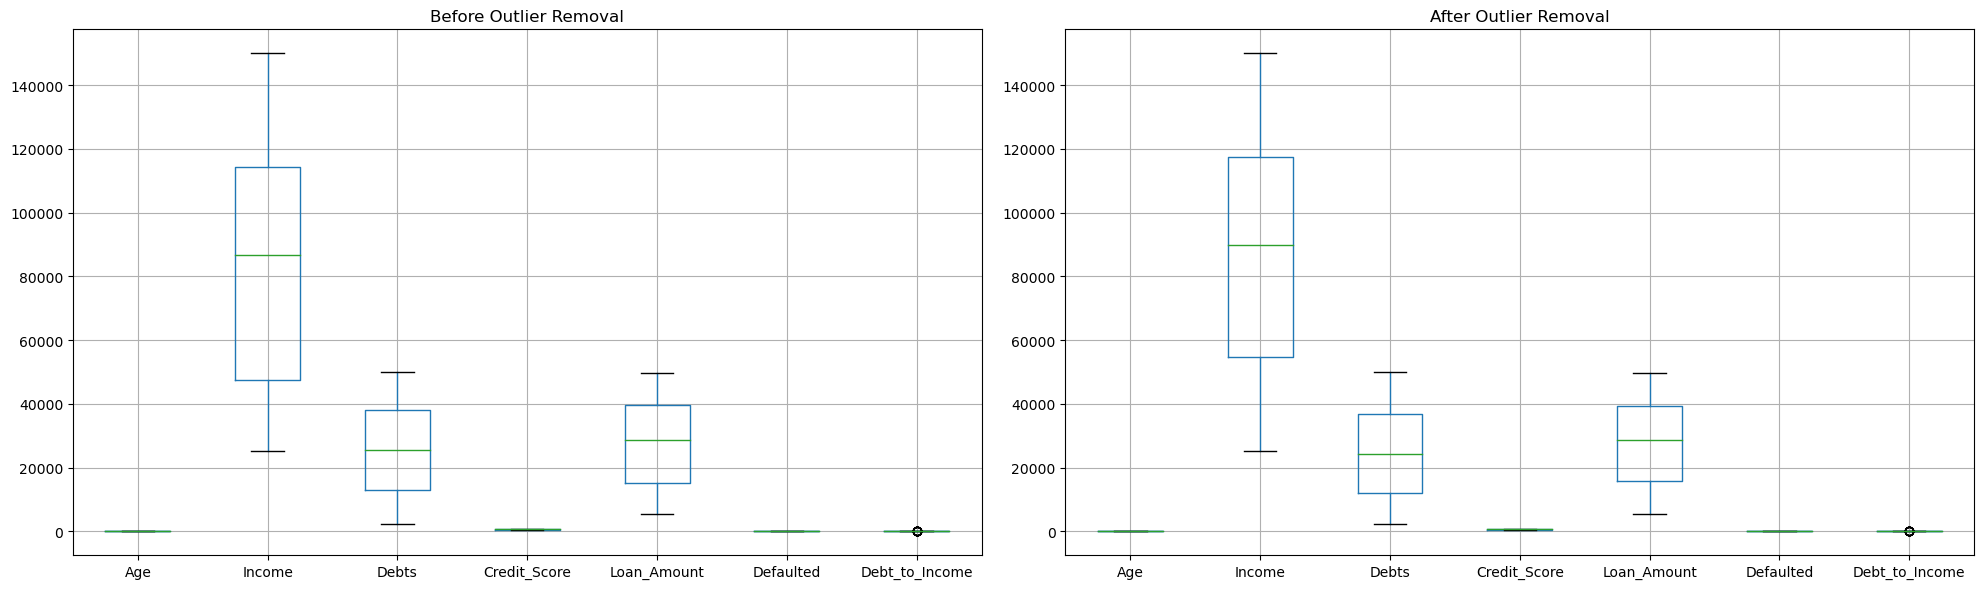

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Select numeric columns
numeric_cols = data.select_dtypes(include=[np.number])

# Step 2: Visualize boxplot before outlier removal
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
numeric_cols.boxplot()
plt.title("Before Outlier Removal")

# Step 3: Calculate IQR and remove outliers
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Apply the IQR filter row-wise
data_cleaned = data[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step 4: Visualize boxplot after outlier removal
plt.subplot(1, 2, 2)
data_cleaned.select_dtypes(include=[np.number]).boxplot()
plt.title("After Outlier Removal")

plt.tight_layout()
plt.show()

# DATA TRANSFORMATION

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])

# Initialize and apply MinMaxScaler
scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)

# Convert scaled data back to DataFrame
scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)

# Reset index to align rows before concatenation
non_numeric_cols.reset_index(drop=True, inplace=True)

# Combine scaled numeric data with original categorical columns
scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols], axis=1)

# Output the result
print(f"Scaled data shape: {scaled_data.shape}")
print("\n" + "*" * 60)
print(scaled_data.head())

Scaled data shape: (200, 11)

************************************************************
        Age    Income     Debts  Credit_Score  Loan_Amount  Defaulted  \
0  0.272727  0.170274  0.919796      0.896488     0.852081        1.0   
1  0.454545  0.234210  0.057193      0.731978     0.689744        1.0   
2  0.931818  0.438189  0.722735      0.914972     0.973635        0.0   
3  0.500000  0.218120  0.780996      0.724584     0.436231        1.0   
4  0.250000  0.484712  0.952595      0.994455     0.207427        1.0   

   Debt_to_Income Payment_History Loan_Purpose Employment_Status  \
0        0.604651      No history         Home           Retired   
1        0.043226            Late         Home        Unemployed   
2        0.273154          Missed      Medical           Retired   
3        0.455778          Missed    Education        Unemployed   
4        0.333606      No history      Medical           Student   

  Marital_Status  
0        Widowed  
1         Single  
2   

# STANDARIZATION


In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_excel("Complex_Credit_Scoring_Dataset.xlsx", sheet_name="Sheet1")

# Drop 'Customer_ID' if it exists
if 'Customer_ID' in df.columns:
    df.drop(columns=['Customer_ID'], inplace=True)

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=[np.number])
non_numeric_cols = df.select_dtypes(exclude=[np.number])

# Fill missing values
numeric_cols.fillna(numeric_cols.mean(), inplace=True)
for col in non_numeric_cols.columns:
    non_numeric_cols[col].fillna(non_numeric_cols[col].mode()[0], inplace=True)

# Scale numeric features
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(numeric_cols)
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_cols.columns)

# Combine numeric + categorical
non_numeric_cols.reset_index(drop=True, inplace=True)
scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols], axis=1)

# Label Encode categorical columns
label_enc = LabelEncoder()
for col in scaled_data.select_dtypes(exclude=[np.number]).columns:
    scaled_data[col] = label_enc.fit_transform(scaled_data[col])

# Final shape and preview
print(f"Scaled data shape: {scaled_data.shape}")
print("*" * 60)
print(scaled_data.head())

Scaled data shape: (200, 10)
************************************************************
        Age    Income     Debts  Credit_Score  Loan_Amount  Defaulted  \
0 -0.766709 -1.007775  1.425934      1.309067     1.134872   0.877446   
1 -0.158511 -0.795483 -1.501127      0.781492     0.608018   0.877446   
2  1.438007 -0.118205  0.757247      1.368345     1.529369  -1.139671   
3 -0.006462 -0.848909  0.954945      0.757781    -0.214745   0.877446   
4 -0.842734  0.036267  1.537228      1.623241    -0.957314   0.877446   

   Payment_History  Loan_Purpose  Employment_Status  Marital_Status  
0                2             2                  1               3  
1                0             2                  4               2  
2                1             3                  1               1  
3                1             1                  4               1  
4                2             3                  3               3  


# Train-Test Split and Standardization

In [37]:
categorical_cols = ["Payment_History", "Loan_Purpose", "Employment_Status", "Marital_Status"]
df[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)


In [38]:
X = df.drop(columns=["Defaulted"])
y = df["Defaulted"]


In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [41]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# Predictions and probability scores

In [42]:

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

# FIX: Use the original (unscaled) target from df
y = df["Defaulted"]  # unscaled original target
X = scaled_data.drop(columns=["Defaulted"])  # all features are scaled

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Check class distribution
print("Before balancing:", Counter(y_train))
print("After balancing:", Counter(y_train_bal))

# Train model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train_bal, y_train_bal)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))


Before balancing: Counter({1: 90, 0: 70})
After balancing: Counter({1: 90, 0: 90})

Classification Report:

              precision    recall  f1-score   support

           0       0.55      0.65      0.59        17
           1       0.70      0.61      0.65        23

    accuracy                           0.62        40
   macro avg       0.62      0.63      0.62        40
weighted avg       0.64      0.62      0.63        40



# Artificial Neural Network (ANN)

In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Target and Features
y = df["Defaulted"]  # use original, unscaled target
X = scaled_data.drop(columns=["Defaulted"])  # scaled features

# Encode y if it's not already numeric
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Before balancing:", Counter(y_train))
print("After balancing:", Counter(y_train_bal))

# ANN Model
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_bal, y_train_bal, 
                    validation_split=0.2,
                    epochs=100, batch_size=16, callbacks=[early_stop], verbose=1)

# Predict
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Before balancing: Counter({1: 90, 0: 70})
After balancing: Counter({1: 90, 0: 90})


C:\Users\ideal\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.5664 - loss: 0.7013 - val_accuracy: 0.2778 - val_loss: 0.7586
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4279 - loss: 0.7525 - val_accuracy: 0.3333 - val_loss: 0.7301
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5042 - loss: 0.7301 - val_accuracy: 0.3889 - val_loss: 0.7277
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5788 - loss: 0.6734 - val_accuracy: 0.3611 - val_loss: 0.7345
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5070 - loss: 0.7306 - val_accuracy: 0.3611 - val_loss: 0.7301
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5275 - loss: 0.7171 - val_accuracy: 0.3611 - val_loss: 0.7323
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6207 - loss: 0.6687 - val_accuracy: 0.3611 - val_loss: 0.7287
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5885 - loss: 0.6675 - val_accuracy: 0.3611 - val_loss:

# evaluate model

In [50]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Predict on test set
y_pred_ann = (model.predict(X_test) > 0.5).astype("int32")

# Classification Report
from sklearn.metrics import classification_report
print("ANN Classification Report:\n")
print(classification_report(y_test, y_pred_ann))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6083 - loss: 0.6595
Test Accuracy: 0.6000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
ANN Classification Report:

              precision    recall  f1-score   support

           0       0.54      0.41      0.47        17
           1       0.63      0.74      0.68        23

    accuracy                           0.60        40
   macro avg       0.58      0.58      0.57        40
weighted avg       0.59      0.60      0.59        40



# confusion matrix

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


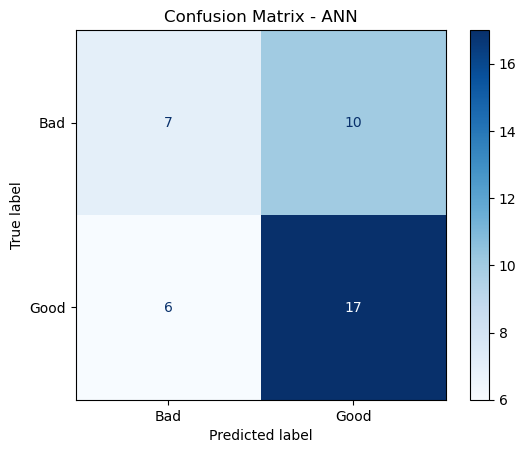

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test data
y_pred_ann = (model.predict(X_test) > 0.5).astype("int32")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_ann)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Bad", "Good"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - ANN")
plt.show()


# random forest

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.41      0.42        17
           1       0.58      0.61      0.60        23

    accuracy                           0.53        40
   macro avg       0.51      0.51      0.51        40
weighted avg       0.52      0.53      0.52        40

🧾 Confusion Matrix:
 [[ 7 10]
 [ 9 14]]


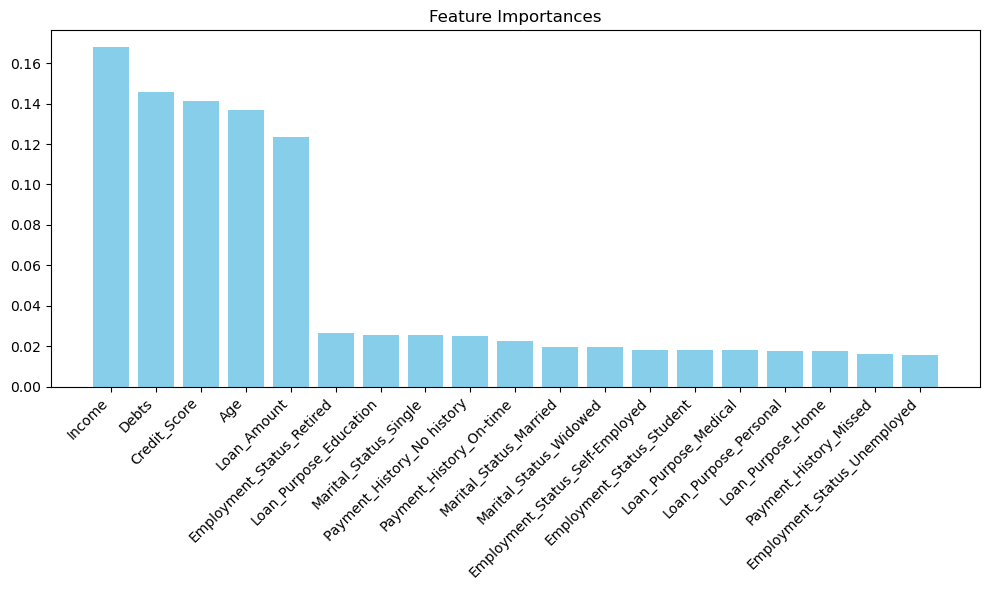

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. Load dataset
data = pd.read_excel("C:/Users/ideal/Downloads/Complex_Credit_Scoring_Dataset.xlsx")

# 2. Drop missing values
data.dropna(inplace=True)

# 3. Set target column
target_column = "Defaulted"  # Change made here

# 4. Drop non-feature columns like ID
data = data.drop(columns=["Customer_ID"])

# 5. Encode categorical features
categorical_cols = data.select_dtypes(include="object").columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# 6. Split features and target
X = data.drop(columns=[target_column])
y = data[target_column]

# 7. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 8. Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 9. Predict and Evaluate
y_pred = model.predict(X_test)
print(" Classification Report:\n", classification_report(y_test, y_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 10. Plot Feature Importances
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=45, ha="right")
plt.tight_layout()
plt.show()



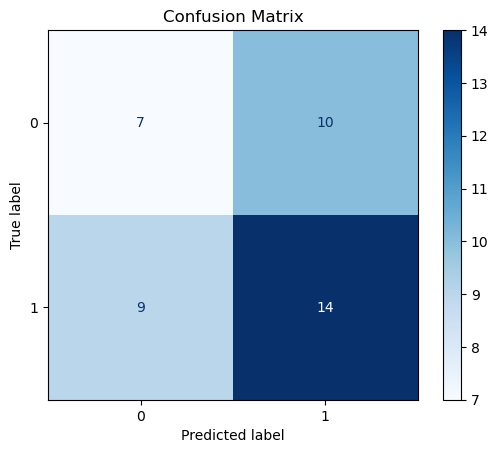

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict
y_pred = model.predict(X_test)

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# Model Comparison

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        17
           1       0.58      0.96      0.72        23

    accuracy                           0.57        40
   macro avg       0.54      0.51      0.41        40
weighted avg       0.55      0.57      0.46        40


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.41      0.41        17
           1       0.57      0.57      0.57        23

    accuracy                           0.50        40
   macro avg       0.49      0.49      0.49        40
weighted avg       0.50      0.50      0.50        40


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.18      0.20        17
           1       0.48      0.57      0.52        23

    accuracy                           0.40        40
   macro